In [1]:
import scanpy as sc
import pandas as pd
from scipy.sparse import csr_matrix

In [2]:
count_data = pd.read_csv('combined_counts.csv', index_col=0)

In [3]:
count_data.set_index('Gene_ID', inplace=True)

In [4]:
count_data = count_data.T

In [5]:
count_data.head()

Gene_ID,ENSMUSG00000051951,ENSMUSG00000089699,ENSMUSG00000102331,ENSMUSG00000102343,ENSMUSG00000025900,ENSMUSG00000025902,ENSMUSG00000104238,ENSMUSG00000104328,ENSMUSG00000033845,ENSMUSG00000025903,...,ENSMUSG00000096550,ENSMUSG00000094172,ENSMUSG00000094887,ENSMUSG00000091585,ENSMUSG00000095763,ENSMUSG00000095523,ENSMUSG00000095475,ENSMUSG00000094855,ENSMUSG00000095019,ENSMUSG00000095041
AAACCCACACAAGCTT-1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9
AAACCCATCAATCTCT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAAAGACGCCCT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AAACGAAAGAGACAAG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAAAGATGCAGC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Create an AnnData object
adata = sc.AnnData(csr_matrix(count_data.values))
adata.var_names = count_data.columns   # Gene IDs as variable names
adata.obs_names = count_data.index     # Cell barcodes as observation names

In [7]:
label = []
for i in range(0, 14303):
    label.append('AB')
for i in range(0, 3368):
    label.append('PMXS')

In [8]:
len(label)

17671

In [9]:
adata.obs['condition'] = label

In [10]:
adata.obs['condition'] = adata.obs['condition'].astype('category')

In [11]:
adata.obs['condition']

AAACCCACACAAGCTT-1      AB
AAACCCATCAATCTCT-1      AB
AAACGAAAGACGCCCT-1      AB
AAACGAAAGAGACAAG-1      AB
AAACGAAAGATGCAGC-1      AB
                      ... 
TTTGGTTTCTCCAATT-1    PMXS
TTTGTTGAGAGGCGGA-1    PMXS
TTTGTTGAGGGTTTCT-1    PMXS
TTTGTTGCACTACAGT-1    PMXS
TTTGTTGTCCGTCAAA-1    PMXS
Name: condition, Length: 17671, dtype: category
Categories (2, object): ['AB', 'PMXS']

In [12]:
# Preprocess the data
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.var['mt'] = adata.var_names.str.startswith('MT-')

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

adata = adata[:, adata.var.highly_variable]

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

C:\Users\tobij\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\preprocessing\_simple.py:657: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')

In [14]:
# Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [15]:
# UMAP for visualization
sc.tl.umap(adata)

In [16]:
# Clustering
sc.tl.leiden(adata)

C:\Users\tobij\AppData\Local\Temp\ipykernel_21832\217038385.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


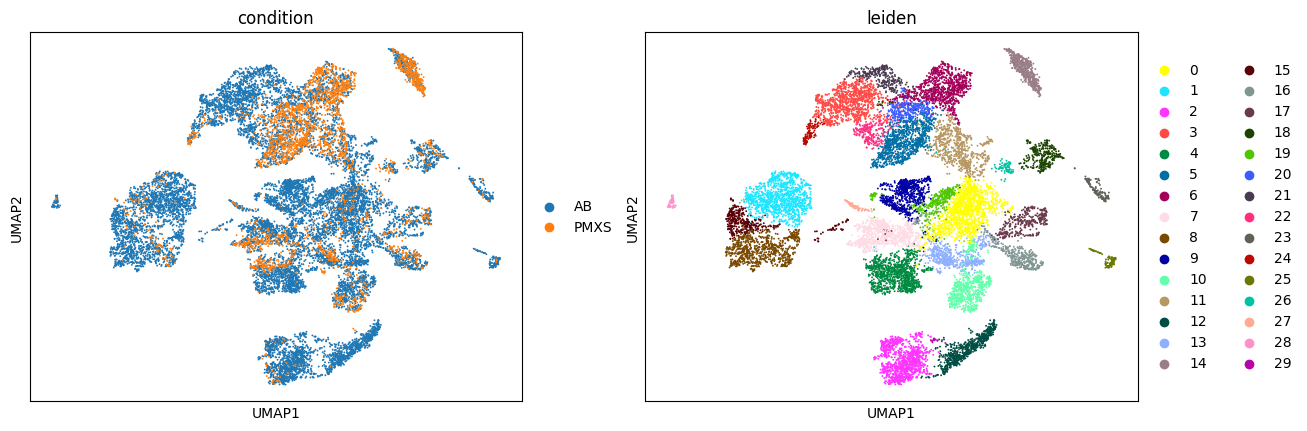

In [17]:
sc.pl.umap(adata, color=['condition', 'leiden'])

In [ ]:
# Identify and plot marker top 25 genes for AB and PMXS groups
sc.tl.rank_genes_groups(adata, groupby='condition', groups=['PMXS', 'AB'], reference='AB')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [18]:
adata.obs['condition'].unique()

['AB', 'PMXS']
Categories (2, object): ['AB', 'PMXS']

In [19]:
sc.tl.rank_genes_groups(adata, groupby='condition', reference='AB')

C:\Users\tobij\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\tools\_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


In [20]:
marker_genes = adata.uns['rank_genes_groups']['names']['PMXS'][:10]
marker_genes

array(['ENSMUSG00000026712', 'ENSMUSG00000015568', 'ENSMUSG00000018927',
       'ENSMUSG00000017754', 'ENSMUSG00000006360', 'ENSMUSG00000019122',
       'ENSMUSG00000040950', 'ENSMUSG00000098557', 'ENSMUSG00000004730',
       'ENSMUSG00000072596'], dtype=object)

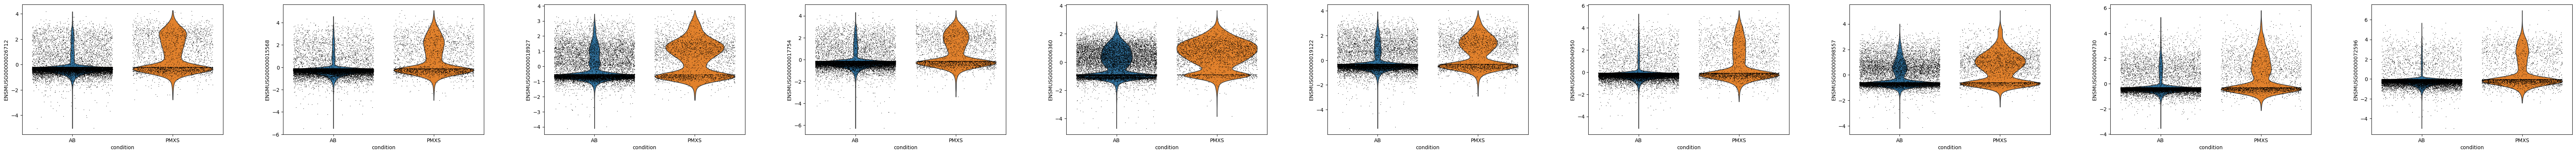

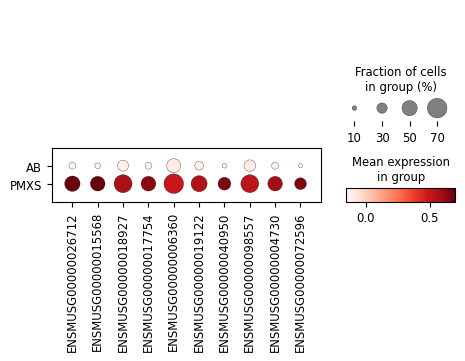

In [21]:
# Plot expression levels
sc.pl.violin(adata, marker_genes, groupby='condition', jitter=0.4)
sc.pl.dotplot(adata, marker_genes, groupby='condition')

In [22]:
adata.write('AnnData.h5ad')

#### 

In [ ]:
# Identify marker genes for each cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [ ]:
# Plot marker genes for the clusters
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [ ]:
# View marker genes
marker_genes = adata.uns['rank_genes_groups']['names']
print(marker_genes)